In [143]:
import pandas as pd

# **Business Understanding**

Toko menghadapi tantangan dalam menentukan waktu yang tepat untuk melibatkan pelanggan dengan program promosi mereka. Promosi yang tidak tepat sasaran dapat mengakibatkan pemborosan sumber daya dan hilangnya potensi keuntungan. Oleh karena itu, diperlukan model machine learning untuk memprediksi pada promosi ke berapa pelanggan akan menerima program tersebut. `Perhitungan evaluasi akan dilakukan menggunakan Macro F-Score.`


# **Data Understanding**

In [144]:
df_train = pd.read_csv("./train_features_with_label.csv")
df_test = pd.read_csv("./test_features.csv")

df_full = pd.concat([df_train, df_test], ignore_index=True)

In [145]:
df_full.head()

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota,jumlah_promosi,ID
0,1979,Sarjana,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,5/5/2014,2.0,NaN
1,1950,Sarjana,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,3/17/2013,0.0,NaN
2,1966,Sarjana,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN,1.0,NaN
3,1961,Magister,Rencana Menikah,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN,4.0,NaN
4,1970,Sarjana,Rencana Menikah,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,NaN,4.0,NaN


### **Features Information**

| **Atribut**              | **Penjelasan**                                                                                     |
|---------------------------|---------------------------------------------------------------------------------------------------|
| `tahun_kelahiran`         | Tahun kelahiran pelanggan                                                                        |
| `pendidikan`              | Tingkat pendidikan pelanggan (SMP, SMA, Sarjana, Magister, Doktor)                               |
| `status_pernikahan`       | Status pernikahan pelanggan (Sendiri, Rencana Menikah, Menikah, Cerai, Cerai Mati)               |
| `pendapatan`              | Pendapatan pelanggan dalam rupiah                                                               |
| `jumlah_anak_balita`      | Banyaknya anak pelanggan yang masih balita                                                      |
| `jumlah_anak_remaja`      | Banyaknya anak pelanggan yang sudah remaja                                                      |
| `terakhir_belanja`        | Jumlah hari berlalu setelah terakhir belanja                                                    |
| `belanja_buah`            | Biaya yang dikeluarkan untuk belanja buah                                                       |
| `belanja_daging`          | Biaya yang dikeluarkan untuk belanja daging                                                     |
| `belanja_ikan`            | Biaya yang dikeluarkan untuk belanja ikan                                                       |
| `belanja_kue`             | Biaya yang dikeluarkan untuk belanja kue                                                        |
| `pembelian_diskon`        | Banyaknya pembelian yang dilakukan saat diskon                                                  |
| `pembelian_web`           | Banyaknya pembelian yang dilakukan secara daring                                                |
| `pembelian_toko`          | Banyaknya pembelian yang dilakukan secara luring                                                |
| `keluhan`                 | 1 - pernah memberikan keluhan, 0 - tidak pernah                                                 |
| `tanggal_menjadi_anggota` | Pertama kali terdaftar sebagai anggota                                                          |
| `jumlah_promosi`          | (Target) Pada promosi ke berapa pelanggan menerima program dari toko, dari total 6 kali promosi. Nilai 0 berarti tidak menerima sama sekali                                                      |

<Axes: xlabel='jumlah_promosi'>

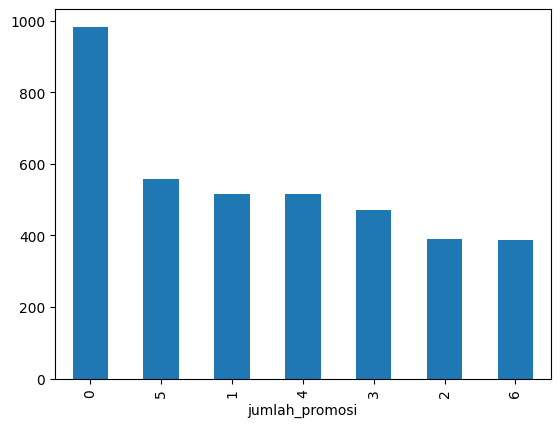

In [146]:
# Label Distribution

df_train['jumlah_promosi'].value_counts().plot(kind='bar')

In [147]:
# Data Information
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7635 entries, 0 to 7634
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tahun_kelahiran          7635 non-null   int64  
 1   pendidikan               7242 non-null   object 
 2   status_pernikahan        7241 non-null   object 
 3   pendapatan               7242 non-null   float64
 4   jumlah_anak_balita       7236 non-null   float64
 5   jumlah_anak_remaja       7221 non-null   float64
 6   terakhir_belanja         7262 non-null   float64
 7   belanja_buah             7268 non-null   float64
 8   belanja_daging           7262 non-null   float64
 9   belanja_ikan             7246 non-null   float64
 10  belanja_kue              7234 non-null   float64
 11  pembelian_diskon         7278 non-null   float64
 12  pembelian_web            7290 non-null   float64
 13  pembelian_toko           7280 non-null   float64
 14  keluhan                 

In [148]:
# Statistic Descriptive
df_full.describe(include='all')

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota,jumlah_promosi,ID
count,7635.000000,7242,7241,7.242000e+03,7236.000000,7221.000000,7262.000000,7268.000000,7.262000e+03,7246.000000,7234.000000,7278.000000,7290.000000,7280.000000,7246.000000,2124,3817.000000,3818.000000
unique,NaN,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1109,NaN,NaN
top,NaN,Sarjana,Rencana Menikah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5/17/2013,NaN,NaN
freq,NaN,3776,2543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN
mean,1967.806942,NaN,NaN,1.154025e+08,0.288004,0.354522,47.206555,60518.768162,4.456959e+05,83383.265388,63590.557921,2.113630,4.450754,5.801648,0.003864,NaN,2.585800,3841.507072
std,11.787612,NaN,NaN,4.740740e+07,0.469056,0.494908,27.002875,75345.181046,5.121959e+05,101911.919007,78926.484973,2.107755,2.969152,3.249644,0.062047,NaN,2.101845,2198.401006
min,1892.000000,NaN,NaN,2.998899e+06,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,2.000000
25%,1959.000000,NaN,NaN,8.143076e+07,0.000000,0.000000,25.000000,7708.000000,5.182575e+04,10115.000000,8092.000000,0.000000,2.000000,3.000000,0.000000,NaN,0.000000,1950.750000
50%,1968.000000,NaN,NaN,1.171642e+08,0.000000,0.000000,47.000000,28295.000000,2.282075e+05,37394.000000,28399.000000,2.000000,4.000000,5.000000,0.000000,NaN,3.000000,3872.500000
75%,1976.000000,NaN,NaN,1.505645e+08,1.000000,1.000000,69.000000,86485.500000,7.032650e+05,127247.250000,90802.000000,3.000000,6.000000,8.000000,0.000000,NaN,4.000000,5770.750000


In [149]:
# Unique Value
df_full.nunique()

tahun_kelahiran              91
pendidikan                    6
status_pernikahan             6
pendapatan                 7225
jumlah_anak_balita            3
jumlah_anak_remaja            3
terakhir_belanja            121
belanja_buah               4936
belanja_daging             5655
belanja_ikan               5106
belanja_kue                4835
pembelian_diskon             20
pembelian_web                18
pembelian_toko               18
keluhan                       2
tanggal_menjadi_anggota    1109
jumlah_promosi                7
ID                         3818
dtype: int64

In [150]:
# Null Value
df_full.isnull().sum()

tahun_kelahiran               0
pendidikan                  393
status_pernikahan           394
pendapatan                  393
jumlah_anak_balita          399
jumlah_anak_remaja          414
terakhir_belanja            373
belanja_buah                367
belanja_daging              373
belanja_ikan                389
belanja_kue                 401
pembelian_diskon            357
pembelian_web               345
pembelian_toko              355
keluhan                     389
tanggal_menjadi_anggota    5511
jumlah_promosi             3818
ID                         3817
dtype: int64

In [151]:
# Duplicated Data
df_full.duplicated().sum()

0

## **Korelasi Fitur**

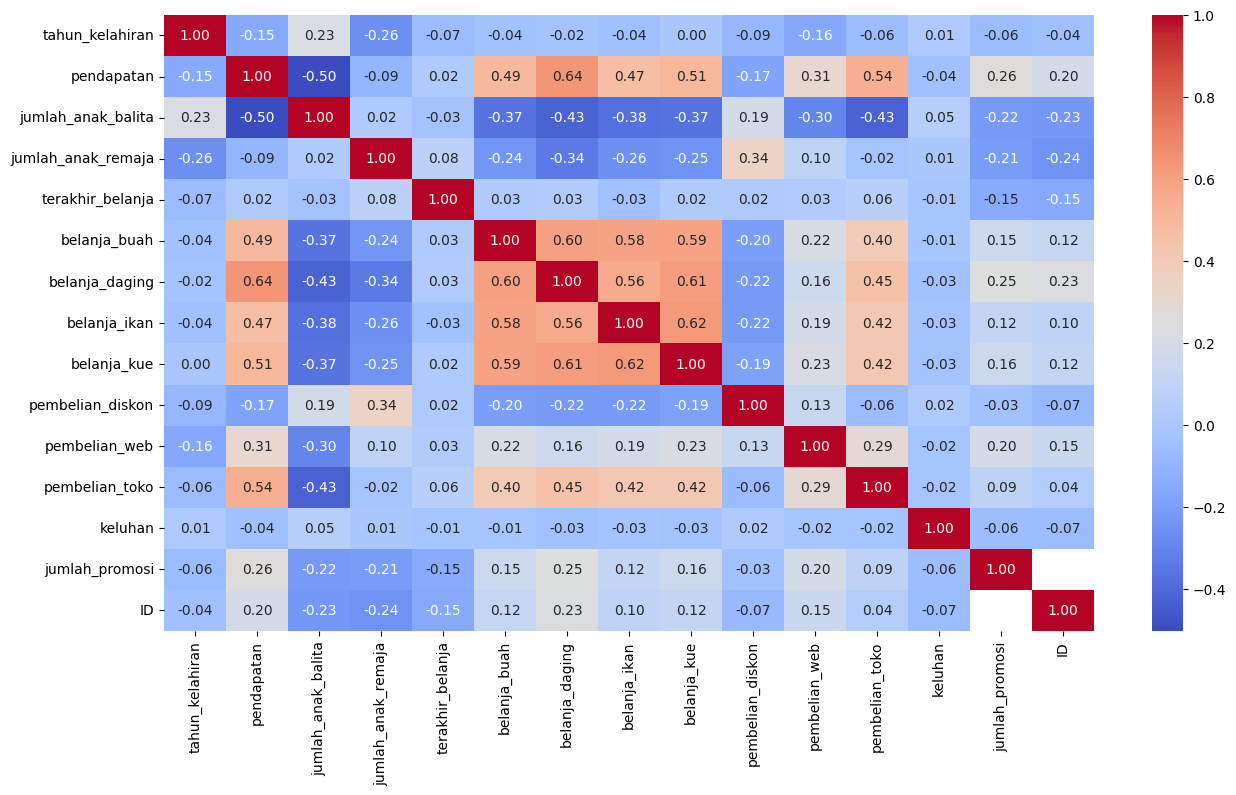

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
corr_matrix = df_full.select_dtypes('number').corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

Berikut adalah tabel hasil analisis korelasi berdasarkan heatmap:

| **Hubungan Antar Fitur**                     | **Korelasi** | **Interpretasi**                                                                                  |
|----------------------------------------------|--------------|--------------------------------------------------------------------------------------------------|
| `total_belanja` vs `belanja_daging`          | 0.97         | Belanja daging menyumbang besar terhadap total belanja pelanggan.                               |
| `total_belanja` vs `belanja_buah`            | 0.70         | Belanja buah juga signifikan terhadap total belanja.                                            |
| `total_belanja` vs `belanja_ikan`            | 0.69         | Belanja ikan memiliki kontribusi besar pada total belanja.                                      |
| `total_anak` vs `jumlah_anak_balita`         | 0.74         | Sebagian besar pelanggan dengan anak memiliki balita.                                           |
| `total_anak` vs `jumlah_anak_remaja`         | 0.70         | Jumlah anak remaja juga signifikan terhadap total anak.                                         |
| `usia` vs `tahun_kelahiran`                  | -1.00        | Korelasi negatif sempurna karena hubungan matematis langsung.                                   |
| `jumlah_anak_balita` vs `usia`               | -0.50        | Pelanggan yang lebih tua cenderung memiliki lebih sedikit anak balita.                         |
| `pendapatan` vs `belanja_buah`               | 0.49         | Pendapatan pelanggan berkorelasi moderat dengan belanja buah.                                   |
| `pendapatan` vs `belanja_daging`             | 0.47         | Pendapatan juga berkorelasi dengan belanja daging, meski lebih rendah dibanding belanja buah.   |
| `jumlah_promosi` vs `pendapatan`             | 0.26         | Pelanggan dengan pendapatan lebih tinggi cenderung menerima lebih banyak promosi.              |
| `jumlah_promosi` vs `total_pembelian`        | 0.21         | Hubungan moderat antara jumlah promosi dan total pembelian pelanggan.                          |
| `jumlah_promosi` vs `pembelian_diskon`       | 0.20         | Pelanggan yang sering membeli saat diskon lebih mungkin menerima promosi lebih banyak.         |
| `keluhan` vs Semua Fitur                     | Sangat Rendah| Tidak ada hubungan signifikan antara keluhan pelanggan dan fitur lainnya.                      |
| `jumlah_promosi` vs `belanja_*`              | ~0.15–0.20   | Hubungan lemah antara jumlah promosi dan belanja individu (buah, daging, ikan, dll.).           |

---

### **Kesimpulan Tabel**
- Korelasi tertinggi ditemukan antara **`total_belanja` dan komponen belanja individu** seperti `belanja_daging`.
- Fitur penting untuk **target `jumlah_promosi`** meliputi `pendapatan`, `total_pembelian`, dan `pembelian_diskon`.
- Fitur seperti `keluhan` memiliki korelasi yang sangat rendah dengan semua fitur lainnya dan target.

## **Spearman Ranked Correlation**

In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Placeholder: Assuming df_full is the DataFrame loaded with the dataset.

# Step 1: Encode categorical columns to numeric
categorical_cols = df_full.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    df_full[col] = df_full[col].astype('category').cat.codes

# Step 2: Convert datetime columns to numeric (days since a reference date)
if 'tanggal_menjadi_anggota' in df_full.columns:
    df_full['tanggal_menjadi_anggota_numeric'] = (pd.Timestamp('2024-01-01') - df_full['tanggal_menjadi_anggota']).dt.days

# Step 3: Compute Spearman Correlation
spearman_corr = df_full.corr(method='spearman')

# Step 4: Visualize Spearman Correlation
plt.figure(figsize=(20, 10))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Spearman Rank Correlation for All Features')
plt.show()

# Step 5: Highlight correlations with target ('jumlah_promosi')
if 'jumlah_promosi' in df_full.columns:
    target_corr = spearman_corr['jumlah_promosi'].sort_values(ascending=False)
    print("Top correlations with 'jumlah_promosi':")
    print(target_corr)

TypeError: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

Berikut adalah hasil analisis korelasi dari heatmap dalam bentuk tabel:

| **Hubungan Antar Fitur**                     | **Korelasi** | **Interpretasi**                                                                                  |
|----------------------------------------------|--------------|--------------------------------------------------------------------------------------------------|
| `total_belanja` vs `belanja_daging`          | 0.98         | Belanja daging memberikan kontribusi terbesar terhadap total belanja pelanggan.                |
| `total_belanja` vs `belanja_buah`            | 0.74         | Belanja buah juga signifikan terhadap total belanja.                                            |
| `total_belanja` vs `belanja_kue`             | 0.72         | Belanja kue juga menyumbang besar terhadap total belanja pelanggan.                            |
| `jumlah_anak_balita` vs `total_anak`         | 0.74         | Sebagian besar pelanggan dengan anak memiliki balita.                                           |
| `pendapatan` vs `belanja_daging`             | 0.84         | Pelanggan dengan pendapatan lebih tinggi mengeluarkan lebih banyak untuk belanja daging.        |
| `pendapatan` vs `total_belanja`              | 0.65         | Pendapatan berkorelasi cukup kuat dengan total belanja pelanggan.                               |
| `jumlah_promosi` vs `total_pembelian`        | 0.31         | Hubungan moderat antara jumlah promosi yang diterima dan total pembelian pelanggan.             |
| `jumlah_promosi` vs `diskon_dominan`         | 0.25         | Pelanggan yang membeli lebih banyak saat diskon lebih cenderung menerima promosi lebih banyak.  |
| `jumlah_promosi` vs `pendapatan`             | 0.27         | Pelanggan dengan pendapatan lebih tinggi lebih sering menerima promosi.                        |
| `usia` vs `tahun_kelahiran`                  | -1.00        | Korelasi negatif sempurna karena hubungan matematis langsung.                                   |
| `jumlah_anak_balita` vs `usia`               | -0.58        | Semakin tua pelanggan, semakin kecil kemungkinan mereka memiliki anak balita.                  |
| `belanja_ikan` vs `jumlah_anak_balita`       | -0.54        | Pelanggan dengan lebih banyak anak balita cenderung memiliki pengeluaran lebih rendah untuk ikan.|
| `jumlah_promosi` vs `belanja_buah`           | 0.23         | Korelasi lemah antara jumlah promosi dan belanja buah.                                          |
| `keluhan` vs Semua Fitur                     | Sangat Rendah| Tidak ada hubungan signifikan antara keluhan pelanggan dan fitur lainnya.                      |

---

## **Chi-Square Test Categorical Features** 

In [154]:
from scipy.stats import chi2_contingency

# Membuat tabel kontingensi
contingency_table = pd.crosstab(df_full['pendidikan'], df_full['status_pernikahan'])

# Melakukan uji Chi-Square
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Menampilkan hasil
print("Chi2 Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)

# Kesimpulan
alpha = 0.05  # Tingkat signifikansi
if p < alpha:
    print("Hasil: Terdapat hubungan yang signifikan antara pendidikan dan status pernikahan.")
else:
    print("Hasil: Tidak terdapat hubungan yang signifikan antara pendidikan dan status pernikahan.")

Chi2 Statistic: 133.85645673598148
p-value: 3.4848666224543037e-13
Degrees of Freedom: 36
Hasil: Terdapat hubungan yang signifikan antara pendidikan dan status pernikahan.


## **Features Engineering**

In [155]:
# 1. Feature Engineering
df_full['usia'] = 2024 - df_full['tahun_kelahiran']
df_full['total_anak'] = df_full['jumlah_anak_balita'].fillna(0) + df_full['jumlah_anak_remaja'].fillna(0)
df_full['lama_menjadi_anggota'] = (pd.to_datetime('2024-01-01') - pd.to_datetime(df_full['tanggal_menjadi_anggota'], errors='coerce')).dt.days

In [156]:
df_full['total_belanja'] = df_full[['belanja_buah', 'belanja_daging', 'belanja_ikan', 'belanja_kue']].sum(axis=1)
df_full['preferensi_belanja'] = df_full[['belanja_buah', 'belanja_daging', 'belanja_ikan', 'belanja_kue']].idxmax(axis=1)

In [157]:
df_full['total_pembelian'] = df_full[['pembelian_diskon', 'pembelian_web', 'pembelian_toko']].sum(axis=1)
df_full['diskon_dominan'] = (df_full['pembelian_diskon'] > df_full['pembelian_web']) & (df_full['pembelian_diskon'] > df_full['pembelian_toko'])

In [159]:
df_full['lama_menjadi_anggota'] = (pd.Timestamp('2024-01-01') - df_full['tanggal_menjadi_anggota']).dt.days

# **Data Preparation**

In [158]:
# Mengonversi kolom 'tanggal_menjadi_anggota' ke format datetime
df_full['tanggal_menjadi_anggota'] = pd.to_datetime(df_full['tanggal_menjadi_anggota'], errors='coerce')

## **Data Cleaning**

In [160]:
# baseline cleaning
df_train_mean = df_full.copy().loc[df_full['jumlah_promosi'].notnull()]
df_train_mean.drop(columns=['ID'], inplace=True)
df_train_mean.head()

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,...,keluhan,tanggal_menjadi_anggota,jumlah_promosi,usia,total_anak,lama_menjadi_anggota,total_belanja,preferensi_belanja,total_pembelian,diskon_dominan
0,1979,5,4,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,...,0.0,1970-01-01 00:00:00.000000937,2.0,45,1.0,19722,382347.0,belanja_daging,9.0,False
1,1950,5,4,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,...,0.0,1970-01-01 00:00:00.000000803,0.0,74,0.0,19722,151725.0,belanja_ikan,19.0,True
2,1966,5,3,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,...,0.0,1969-12-31 23:59:59.999999999,1.0,58,0.0,19723,624985.0,belanja_daging,9.0,False
3,1961,2,4,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,...,0.0,1969-12-31 23:59:59.999999999,4.0,63,0.0,19723,1973840.0,belanja_daging,15.0,False
4,1970,5,4,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,...,0.0,1969-12-31 23:59:59.999999999,4.0,54,2.0,19723,476553.0,belanja_daging,18.0,True


In [161]:
df_train_mean.isnull().sum()

tahun_kelahiran              0
pendidikan                   0
status_pernikahan            0
pendapatan                 190
jumlah_anak_balita         190
jumlah_anak_remaja         204
terakhir_belanja           172
belanja_buah               181
belanja_daging             178
belanja_ikan               193
belanja_kue                214
pembelian_diskon           178
pembelian_web              165
pembelian_toko             169
keluhan                    196
tanggal_menjadi_anggota      0
jumlah_promosi               0
usia                         0
total_anak                   0
lama_menjadi_anggota         0
total_belanja                0
preferensi_belanja           0
total_pembelian              0
diskon_dominan               0
dtype: int64

In [162]:
df_train_mean['lama_menjadi_anggota'].fillna(0,inplace=True)
# Mengisi nilai NaN pada kolom kategorikal dengan mode masing-masing kolom
for col in df_train_mean.select_dtypes('object').columns:
    df_train_mean[col].fillna(df_train_mean[col].mode()[0], inplace=True)
    
for col in df_train_mean.select_dtypes('number').columns:
    df_train_mean[col].fillna(df_train_mean[col].median(), inplace=True)

In [ ]:
# Encoding ordinal untuk pendidikan
pendidikan_order = ['SMP', 'SMA', 'Sarjana', 'Magister', 'Doktor']
df_train_mean['pendidikan_encoded'] = df_train_mean['pendidikan'].astype(pd.CategoricalDtype(categories=pendidikan_order, ordered=True)).cat.codes

# One-Hot Encoding pada kolom 'status_pernikahan'
df_train_mean = pd.get_dummies(df_train_mean, columns=['status_pernikahan'], prefix='status', drop_first=True)
df_train_mean = pd.get_dummies(df_train_mean, columns=['preferensi_belanja'], prefix='status', drop_first=True)

KeyError: "None of [Index(['status_pernikahan'], dtype='object')] are in the [columns]"

In [174]:
from sklearn.preprocessing import StandardScaler

# Pilih kolom numerik
numerical_cols = df_train_mean.drop(columns=['jumlah_promosi']).select_dtypes(include=['number']).columns

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Terapkan Standarisasi
df_train_mean[numerical_cols] = scaler.fit_transform(df_train_mean[numerical_cols])

df_train_mean

,tahun_kelahiran,pendidikan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota,jumlah_promosi,usia,total_anak,lama_menjadi_anggota,total_belanja,total_pembelian,diskon_dominan,pendidikan_encoded,status_0,status_1,status_2,status_3,status_4,status_5,status_belanja_daging,status_belanja_ikan,status_belanja_kue
0,0.949813,0.910319,0.025533,-0.598314,1.368276,-0.008360,-0.105364,-0.333698,-0.291698,-0.530330,-0.058390,-0.822917,-0.233523,-0.068834,1970-01-01 00:00:00.000000937,2.0,-0.949813,0.569266,-1.609590,-0.346648,-0.502100,False,0.0,False,False,False,False,True,False,True,False,False
1,-1.514793,0.910319,-0.719475,-0.598314,-0.688719,0.861270,-0.718517,-0.764918,0.018234,-0.530330,3.355463,0.538624,-0.551752,-0.068834,1970-01-01 00:00:00.000000803,0.0,1.514793,-0.902881,-1.609590,-0.694414,1.301681,True,0.0,False,False,False,False,True,False,False,True,False
2,-0.155011,0.910319,0.306723,-0.598314,-0.688719,-0.083980,0.818182,-0.324748,0.175738,1.084939,-0.546084,-1.163302,0.402934,-0.068834,1969-12-31 23:59:59.999999999,1.0,0.155011,-0.902881,0.621276,0.019238,-0.502100,False,0.0,False,False,False,True,False,False,True,False,False
3,-0.579943,-0.748243,1.204910,-0.598314,-0.688719,1.617470,2.040671,2.361529,-0.525079,0.831005,-1.033777,0.879009,0.721162,-0.068834,1969-12-31 23:59:59.999999999,4.0,0.579943,-0.902881,0.621276,2.053243,0.580168,False,0.0,False,False,False,False,True,False,True,False,False
4,0.184935,0.910319,0.074678,1.550099,1.368276,1.163750,0.445545,-0.232518,-0.396051,-0.354490,2.380076,0.538624,-0.233523,-0.068834,1969-12-31 23:59:59.999999999,4.0,-0.184935,2.041414,0.621276,-0.204590,1.121303,True,0.0,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812,-1.089861,-0.748243,-0.857897,-0.598314,-0.688719,-0.537701,-0.718517,-0.801830,-0.768868,-0.716493,1.404690,-1.163302,-1.824665,-0.068834,1969-12-31 23:59:59.999999999,5.0,1.089861,-0.902881,0.621276,-0.860347,-1.043235,True,0.0,False,False,False,True,False,False,True,False,False
3813,-1.769752,-1.301097,-0.123556,-0.598314,1.368276,-0.121790,-0.802129,-0.752828,-0.440005,-0.791030,0.429303,0.538624,-0.869980,-0.068834,1970-01-01 00:00:00.000000987,1.0,1.769752,0.569266,-1.609590,-0.846943,0.039034,False,0.0,False,False,False,False,True,False,True,False,False
3814,0.524881,-0.748243,-0.234156,-0.598314,3.425270,0.785650,-0.774258,-0.728647,-0.725603,-0.791030,2.380076,0.198238,0.402934,-0.068834,1970-01-01 00:00:00.000000148,0.0,-0.524881,2.041414,-1.609590,-0.813387,1.301681,False,0.0,False,False,False,True,False,False,True,False,False
3815,-0.919888,-0.195389,-0.087107,1.550099,1.368276,0.747840,-0.551293,-0.712527,-0.560306,-0.432842,0.916996,0.198238,-0.551752,-0.068834,1970-01-01 00:00:00.000000981,0.0,0.919888,2.041414,-1.609590,-0.752375,0.219412,False,0.0,False,False,False,False,True,False,True,False,False


In [172]:
df_train_mean['jumlah_promosi'] = df_train_mean['jumlah_promosi'].astype('object')

In [175]:
df_train_mean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3817 entries, 0 to 3816
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   tahun_kelahiran          3817 non-null   float64       
 1   pendidikan               3817 non-null   float64       
 2   pendapatan               3817 non-null   float64       
 3   jumlah_anak_balita       3817 non-null   float64       
 4   jumlah_anak_remaja       3817 non-null   float64       
 5   terakhir_belanja         3817 non-null   float64       
 6   belanja_buah             3817 non-null   float64       
 7   belanja_daging           3817 non-null   float64       
 8   belanja_ikan             3817 non-null   float64       
 9   belanja_kue              3817 non-null   float64       
 10  pembelian_diskon         3817 non-null   float64       
 11  pembelian_web            3817 non-null   float64       
 12  pembelian_toko           3817 non-null 

# **Modelling**

In [176]:
from pycaret.classification import *

# 1. Setup PyCaret
classification_setup = setup(
    data=df_train_mean,
    target='jumlah_promosi',  # Kolom target diskrit
    session_id=42,            # Seed untuk reproduktifitas
)

# 2. Bandingkan Model
best_model = compare_models()

,Description,Value
0,Session id,42
1,Target,jumlah_promosi
2,Target type,Multiclass
3,Original data shape,"(3817, 32)"
4,Transformed data shape,"(3817, 34)"
5,Transformed train set shape,"(2671, 34)"
6,Transformed test set shape,"(1146, 34)"
7,Numeric features,20
8,Date features,1
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.6769,0.8989,0.6769,0.6721,0.6635,0.6101,0.6148,4.4510
xgboost,Extreme Gradient Boosting,0.6758,0.8954,0.6758,0.6741,0.6674,0.6094,0.6129,0.1860
lightgbm,Light Gradient Boosting Machine,0.6668,0.8986,0.6668,0.6697,0.6592,0.5974,0.6019,0.9250
rf,Random Forest Classifier,0.6496,0.8646,0.6496,0.6442,0.6227,0.5738,0.5847,0.0800
et,Extra Trees Classifier,0.6369,0.8683,0.6369,0.6319,0.6134,0.5596,0.5679,0.0730
gbc,Gradient Boosting Classifier,0.5987,0.0000,0.5987,0.5811,0.5765,0.5149,0.5207,0.7610
knn,K Neighbors Classifier,0.5384,0.8029,0.5384,0.5229,0.5210,0.4443,0.4476,0.2730
dt,Decision Tree Classifier,0.4953,0.6992,0.4953,0.4963,0.4933,0.3996,0.4002,0.0130
ada,Ada Boost Classifier,0.4081,0.0000,0.4081,0.3787,0.3765,0.2869,0.2916,0.0450
ridge,Ridge Classifier,0.3991,0.0000,0.3991,0.3168,0.3218,0.2570,0.2728,0.0090


# **Tunning**

# **Predict New Data**